# 15.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1
* To process mail efficiently and route each letter to the correct destination, postal service computers must be able to **scan handwritten names, addresses and zip codes** and **recognize the letters and digits**
* **Scikit-learn** enables even novice programmers to make such machine-learning problems manageable

<hr style="height:2px; border:none; color:black; background-color:black;">

### Supervised Machine Learning: Classification
* Attempt to **predict the distinct class** (category) to which a **sample** belongs
    * **Binary classification**&mdash;**two** classes (e.g., “dog” or “cat”)
* [**Digits dataset**](http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset) bundled with scikit-learn
    * 8-by-8 pixel images representing 1797 hand-written digits (0 through 9)
* Goal: **Predict** which digit an image represents
    * **Multi-classification**&mdash;**10 possible digits** (the classes)
* Train a classification model using **labeled data**—know in advance each digit’s class
* We’ll use one of the simplest machine-learning classification algorithms, **k-nearest neighbors (k-NN)**, to **recognize handwritten digits**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.1 k-Nearest Neighbors Algorithm (k-NN)
* Predict a sample’s class by looking at the **_k_ training samples** **nearest in "distance"** to the **sample**
* Filled dots represent four distinct classes—A (blue), B (green), C (red) and D (purple)
* **Class with the most “votes” wins**
    * **Odd _k_ value** **avoids ties** &mdash; there’s never an equal number of votes
    


<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.2 Loading the Dataset with the **`load_digits` Function**
* Returns a **`Bunch`** object containing **digit samples** and **metadata**
* A **`Bunch`** is a dictionary with additional **dataset-specific attributes**

In [1]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
type(digits)

sklearn.utils._bunch.Bunch

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying Digits Dataset's Description
* **Digits dataset** is a subset of the [**UCI (University of California Irvine) ML hand-written digits dataset**](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
    * Original dataset: **5620 samples**—3823 for **training** and 1797 for **testing**
    * **Digits dataset**: Only the **1797 testing samples**
* A Bunch’s **`DESCR` attribute** contains dataset's description
    * Each sample has **`64` features** (**`Number of Attributes`**) that represent an **8-by-8 image** with **pixel values `0`–`16`** (**`Attribute Information`**)
    * **No missing values** (**`Missing Attribute Values`**)
* **64 features** may seem like a lot
    * Datasets can have **hundreds**, **thousands** or even **millions of features**
    * Processing datasets like these can require enormous computing capabilities

In [ ]:
print(digits.DESCR)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Sample and Target Sizes (1 of 2)
* `Bunch` object’s **`data`** and **`target`** attributes are **NumPy arrays**:
    * **`data` array**: The **1797 samples** (digit images), each with **64 features** with values**&nbsp;0** (white) to **16** (black), representing **pixel intensities**

    * **`target` array**: The **images’ labels**, (classes) indicating **which digit** each image represents

In [ ]:
digits.target[::100]  # target values of every 100th sample

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Sample and Target Sizes (2 of 2)
* Confirm number of **samples** and **features** (per sample) via `data` array’s **`shape`**

In [ ]:
digits.data.shape

(1797, 64)

* Confirm that **number of target values matches number of samples** via `target` array’s `shape`

In [ ]:
digits.target.shape

(1797,)

<hr style="height:2px; border:none; color:black; background-color:black;">

### A Sample Digit Image
* Images are **two-dimensional**—width and a height in pixels
* Digits dataset's `Bunch` object has an **`images` attribute**
    * Each element is an **8-by-8 array** representing a **digit image’s pixel intensities**
* Scikit-learn stores the intensity values as **NumPy type `float64`**

In [ ]:
digits.images[13]  # show array for sample image at index 13

### Preparing the Data for Use with Scikit-Learn (1 of 2)
* Scikit-learn estimators require samples to be stored in a **two-dimensional array of floating-point values** (or **list of lists** or **pandas `DataFrame`**):
	* Each **row** represents one **sample**
	* Each **column** in a given row represents one **feature** for that sample
* Multi-dimensional data samples must be **flattened** into a **one-dimensional array**
* For **categorical features** (e.g., **strings** like `'spam'` or `'not-spam'`), you’d have to **preprocess** those features into **numerical values**—known as **one-hot encoding** (discussed later in deep learning)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Preparing the Data for Use with Scikit-Learn (2 of 2)
* **`load_digits`** returns the **preprocessed data** ready for machine learning
* **8-by-8 array `digits.images[13]`** corresponds to **1-by-64 array `digits.data[13]`**:

In [ ]:
digits.data[13]

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.3 Visualizing the Data (1 of 2)
* Always familiarize yourself with your data&mdash;called **data exploration**
* Let's **visualize** the dataset’s first 24 images with **Matplotlib**
* To see **how difficult a problem handwritten digit recognition is**, consider the **variations** among the images of the 3s in the first, third and fourth rows, and look at the images of the 2s in the first, third and fourth rows.

<hr style="height:2px; border:none; color:black; background-color:black;">

### Creating the Diagram
* **Color map `plt.cm.gray_r`** is for **grayscale** with **0 for white**
* [**Matplotlib’s color map names**](https://matplotlib.org/examples/color/colormaps_reference.html)&mdash;accessible via **`plt.cm` object** or a **string, like `'gray_r'`**

In [ ]:
import matplotlib.pyplot as plt

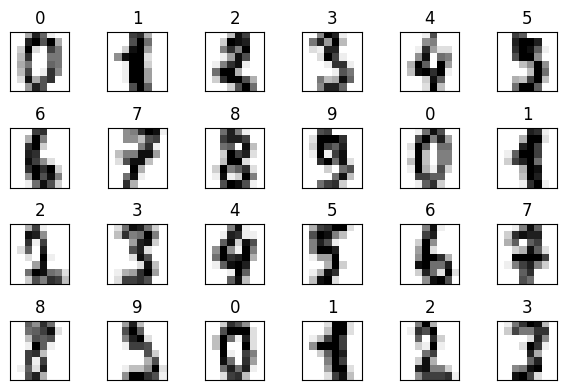

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
digits.images.shape

(1797, 8, 8)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.4 Splitting the Data for Training and Testing (1 of 2)
* Typically **train** a model with a **subset of a dataset**
* **Save a portion for testing**, so you can evaluate a model’s performance using **unseen data**
* Function **`train_test_split`** **shuffles** the data to **randomize** it, then **splits** the **samples** in the `data` array and the **target values** in the `target` array into **training** and **testing sets**
    * Shuffling helps ensure that the **training and testing sets** have **similar characteristics**
    * Returns a **tuple of four elements** in which the **first two** are the **samples** split into **training** and **testing sets**, and the **last two** are the **corresponding target values** split into **training** and **testing sets**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.4 Splitting the Data for Training and Testing (2 of 2)
* Convention:
    * **Uppercase `X`** represents **samples**
    * **Lowercase `y`** represents **target values**

In [ ]:
from sklearn.model_selection import train_test_split

# Prendo soltanto le 16 direzioni principali del dataset

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_new = pca.fit(digits.data).transform(digits.data)


In [ ]:
data_new.shape

(1797, 4)

# Mostriamo i dati a dimensionalità ridotta

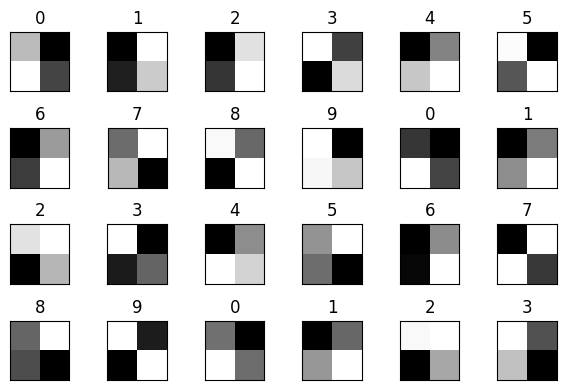

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), data_new.reshape(1797, 2, 2), digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_new, digits.target, random_state=11)  # random_state for reproducibility

* Scikit-learn bundled classification datasets have **balanced classes**
    * Samples are **divided evenly** among the classes
    * **Unbalanced classes** could lead to incorrect results

<hr style="height:2px; border:none; color:black; background-color:black;">

### Training and Testing Set Sizes
* **By default**, `train_test_split` reserves **75%** of the data for **training** and **25%** for **testing**
    * See how to customize this in my [**Python Fundamentals LiveLessons** videos](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson14_11) or in [**Python for Programmers**, Section 14.2.4](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch14.xhtml#ch14lev2sec8)

In [ ]:
X_train.shape

(1347, 4)

In [ ]:
X_test.shape

(450, 4)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.5 Creating the Model
* In **scikit-learn**, **models** are called **estimators**
* **`KNeighborsClassifier`** estimator implements the **k-nearest neighbors algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.6 Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (1 of 2)
* Load **sample training set (`X_train`)** and **target training set (`y_train`)** into the estimator

In [ ]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

* **`n_neighbors`** corresponds to **_k_ in the k-nearest neighbors algorithm**
* [`KNeighborsClassifier` default settings](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.6 Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (2 of 2)
* **`fit` normally loads data** into an **estimator** then performs complex calculations **behind the scenes** that **learn** from the data to train a model
* **`KNeighborsClassifier`’s `fit` method** **just loads the data**
    * **No initial learning process**
    * The **estimator** is **lazy** &mdash; work is performed only when you use it to make predictions
* **Lots of models** have **significant training phases** that can take minutes, hours, days or more
    * High-performance **GPUs** and **TPUs** can significantly **reduce model training time**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.7 Predicting Digit Classes with the `KNeighborsClassifier`’s  **`predict` method** (1 of 2)
* Returns an array containing the **predicted class of each test image**:

In [ ]:
predicted = knn.predict(X=X_test)

In [ ]:
expected = y_test

* **`predicted` digits** vs. **`expected` digits** for the first 20 test samples&mdash;see **index 18**

In [ ]:
predicted[:20]

In [ ]:
expected[:20]

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.7 Predicting Digit Classes with the `KNeighborsClassifier`’s **`predict` method** (2 of 2)
* Locate **all incorrect predictions** for the **entire test set**:

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [ ]:
wrong

* **Incorrectly predicted only ?? of the 450 test samples**



<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2
## 15.3.1 Metrics for Measuring Model Accuracy

### Estimator Method `score`
* Returns an **indication of how well the estimator performs** on **test data**
* For **classification estimators**, returns the **prediction accuracy** for the test data:

In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')

88.67%


* `kNeighborsClassifier` with default **_k_** of 5 achieved **97.78% prediction accuracy** using only the estimator’s **default parameters**
* Can use **hyperparameter tuning** to try to determine the **optimal value for _k_**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Confusion Matrix (1 of 2)
* Shows correct and incorrect predicted values (the **hits** and **misses**) for a given class

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [ ]:
confusion

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 47,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  2,  4,  7],
       [ 0,  0,  0,  0, 48,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0, 40,  3,  0],
       [ 0,  2,  0,  2,  0,  4,  0,  1, 33,  2],
       [ 0,  0,  0,  0,  0,  3,  0,  4,  1, 35]])

### Confusion Matrix (2 of 2)
* **Correct predictions** shown on **principal diagonal** from top-left to bottom-right
* **Nonzero values** not on **principal diagonal** indicate **incorrect predictions**
* Each **row** represents **one distinct class** (0–9)
* **Columns** specify how many **test samples** were classified into classes 0–9
* **Row 0** shows digit class **`0`**&mdash;**all 0s were predicted correctly**
>`[45,  0,  0,  0,  0,  0,  0,  0,  0,  0]`
* **Row 8** shows digit class **`8`**&mdash;**five 8s were predicted incorrectly**
>`[ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1]`

    * **Correctly predicted 88.63%** (39 of 44) of `8`s
    * 8s harder to recognize

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Confusion Matrix
* A **heat map** displays **values** as **colors**
* Convert the **confusion matrix** into a **`DataFrame`**, then graph it
* **Principal diagonal** and **incorrect predictions** stand out nicely in **heat map**

In [ ]:
import pandas as pd

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [ ]:
import seaborn as sns

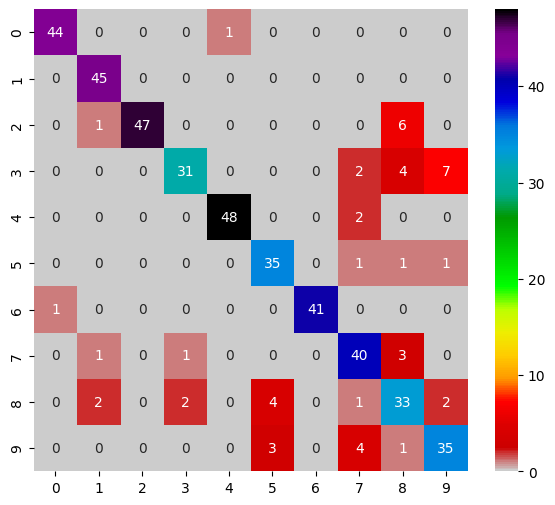

In [ ]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
                   cmap=plt.cm.nipy_spectral_r)

<!-- ### Visualizing the Confusion Matrix (3 of 4)
![Confusion matrix displayed as a heat map](./ch14images/confusion_nipy_spectral_r.png "Confusion matrix displayed as a heat map") -->

------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 5 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).

DISCLAIMER: The authors and publisher of this book have used their
best efforts in preparing the book. These efforts include the
development, research, and testing of the theories and programs
to determine their effectiveness. The authors and publisher make
no warranty of any kind, expressed or implied, with regard to these
programs or to the documentation contained in these books. The authors
and publisher shall not be liable in any event for incidental or
consequential damages in connection with, or arising out of, the
furnishing, performance, or use of these programs.                  